# Fusion de fichiers

In [10]:
import pandas as pd

data_without_contrib = pd.read_csv("final_translated_data.csv", index_col=0)
data_contrib = pd.read_csv("df_contributors_src.csv", index_col=0)

data = pd.merge(data, data_contrib, left_index=True, right_index=True)
data

,name,full_name,url,description,stars,created_at,language,forks,watchers,updated_at,open_issues,topics,license,type_of_owner,contributors
0,HyperDbg,HyperDbg/HyperDbg,https://github.com/HyperDbg/HyperDbg,State-of-the-art native debugging tool,2173,2020-01-01T12:34:32Z,C,317,2173,2023-06-23T10:17:49Z,NaN,"['debug', 'debugger', 'ept', 'hook', 'hyperdbg...","{'key': 'gpl-3.0', 'name': 'GNU General Public...",Organization,"{'src_repository': 'HyperDbg/HyperDbg', 'contr..."
1,octo4a,feelfreelinux/octo4a,https://github.com/feelfreelinux/octo4a,Use your old Android device as an OctoPrint se...,1265,2020-01-01T17:00:11Z,Kotlin,123,1265,2023-06-21T22:24:04Z,NaN,"['3d-printing', 'android', 'octoprint']","{'key': 'agpl-3.0', 'name': 'GNU Affero Genera...",User,"{'src_repository': 'feelfreelinux/octo4a', 'co..."
2,VIMKiller,caseykneale/VIMKiller,https://github.com/caseykneale/VIMKiller,Exiting VIM is hard; sometimes we need to take...,1159,2020-01-01T01:31:29Z,Julia,13,1159,2023-06-21T16:37:23Z,NaN,[],"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,"{'src_repository': 'caseykneale/VIMKiller', 'c..."
3,OpenSeeFace,emilianavt/OpenSeeFace,https://github.com/emilianavt/OpenSeeFace,Robust realtime face and facial landmark track...,1105,2020-01-01T12:49:35Z,Python,134,1105,2023-06-23T11:37:45Z,NaN,"['cpu', 'csharp', 'depth-estimation', 'detecti...","{'key': 'bsd-2-clause', 'name': 'BSD 2-Clause ...",User,"{'src_repository': 'emilianavt/OpenSeeFace', '..."
4,react-typescript-web-extension-starter,aeksco/react-typescript-web-extension-starter,https://github.com/aeksco/react-typescript-web...,:desktop_computer: Web Extension starter kit b...,805,2020-01-01T01:14:35Z,JavaScript,73,805,2023-06-18T12:59:14Z,NaN,"['brave', 'chrome-extension', 'eslint', 'exten...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,{'src_repository': 'aeksco/react-typescript-we...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,seed-wyse-vector,ruikishimoto/seed-wyse-vector,https://github.com/ruikishimoto/seed-wyse-vector,in,9,2023-06-10T02:19:31Z,PHP,0,9,2023-06-23T14:55:57Z,NaN,[],"{'key': 'other', 'name': 'Other', 'spdx_id': '...",User,"{'src_repository': 'csonchen/wxParse', 'contri..."
23996,jd_ql_assistant,SSJACK8582/jd_ql_assistant,https://github.com/SSJACK8582/jd_ql_assistant,Jingdong Qinglong snapping up assistant,9,2023-06-10T13:05:14Z,Python,2,9,2023-06-20T07:48:09Z,NaN,[],NaN,User,{'src_repository': 'svelte-society/sveltesocie...
23997,dating_app_moonmeet_react_native,johncoffeeocean/dating_app_moonmeet_react_native,https://github.com/johncoffeeocean/dating_app_...,in,9,2023-06-10T04:59:10Z,JavaScript,0,9,2023-06-23T15:01:38Z,NaN,[],"{'key': 'gpl-3.0', 'name': 'GNU General Public...",User,"{'src_repository': 'Slion/Fulguris', 'contribu..."
23998,interim,JD557/interim,https://github.com/JD557/interim,Immediate mode GUI in pure Scala,9,2023-06-10T14:38:21Z,Scala,1,9,2023-06-19T12:14:26Z,NaN,"['gui', 'immediate-gui', 'scala', 'scala-js', ...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,"{'src_repository': 'B1ueber2y/TrianFlow', 'con..."


In [12]:
data["open_issues"].isna().sum()

24000

In [14]:
data.drop("open_issues", inplace = True, axis=1)
data

,name,full_name,url,description,stars,created_at,language,forks,watchers,updated_at,topics,license,type_of_owner,contributors
0,HyperDbg,HyperDbg/HyperDbg,https://github.com/HyperDbg/HyperDbg,State-of-the-art native debugging tool,2173,2020-01-01T12:34:32Z,C,317,2173,2023-06-23T10:17:49Z,"['debug', 'debugger', 'ept', 'hook', 'hyperdbg...","{'key': 'gpl-3.0', 'name': 'GNU General Public...",Organization,"{'src_repository': 'HyperDbg/HyperDbg', 'contr..."
1,octo4a,feelfreelinux/octo4a,https://github.com/feelfreelinux/octo4a,Use your old Android device as an OctoPrint se...,1265,2020-01-01T17:00:11Z,Kotlin,123,1265,2023-06-21T22:24:04Z,"['3d-printing', 'android', 'octoprint']","{'key': 'agpl-3.0', 'name': 'GNU Affero Genera...",User,"{'src_repository': 'feelfreelinux/octo4a', 'co..."
2,VIMKiller,caseykneale/VIMKiller,https://github.com/caseykneale/VIMKiller,Exiting VIM is hard; sometimes we need to take...,1159,2020-01-01T01:31:29Z,Julia,13,1159,2023-06-21T16:37:23Z,[],"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,"{'src_repository': 'caseykneale/VIMKiller', 'c..."
3,OpenSeeFace,emilianavt/OpenSeeFace,https://github.com/emilianavt/OpenSeeFace,Robust realtime face and facial landmark track...,1105,2020-01-01T12:49:35Z,Python,134,1105,2023-06-23T11:37:45Z,"['cpu', 'csharp', 'depth-estimation', 'detecti...","{'key': 'bsd-2-clause', 'name': 'BSD 2-Clause ...",User,"{'src_repository': 'emilianavt/OpenSeeFace', '..."
4,react-typescript-web-extension-starter,aeksco/react-typescript-web-extension-starter,https://github.com/aeksco/react-typescript-web...,:desktop_computer: Web Extension starter kit b...,805,2020-01-01T01:14:35Z,JavaScript,73,805,2023-06-18T12:59:14Z,"['brave', 'chrome-extension', 'eslint', 'exten...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,{'src_repository': 'aeksco/react-typescript-we...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,seed-wyse-vector,ruikishimoto/seed-wyse-vector,https://github.com/ruikishimoto/seed-wyse-vector,in,9,2023-06-10T02:19:31Z,PHP,0,9,2023-06-23T14:55:57Z,[],"{'key': 'other', 'name': 'Other', 'spdx_id': '...",User,"{'src_repository': 'csonchen/wxParse', 'contri..."
23996,jd_ql_assistant,SSJACK8582/jd_ql_assistant,https://github.com/SSJACK8582/jd_ql_assistant,Jingdong Qinglong snapping up assistant,9,2023-06-10T13:05:14Z,Python,2,9,2023-06-20T07:48:09Z,[],NaN,User,{'src_repository': 'svelte-society/sveltesocie...
23997,dating_app_moonmeet_react_native,johncoffeeocean/dating_app_moonmeet_react_native,https://github.com/johncoffeeocean/dating_app_...,in,9,2023-06-10T04:59:10Z,JavaScript,0,9,2023-06-23T15:01:38Z,[],"{'key': 'gpl-3.0', 'name': 'GNU General Public...",User,"{'src_repository': 'Slion/Fulguris', 'contribu..."
23998,interim,JD557/interim,https://github.com/JD557/interim,Immediate mode GUI in pure Scala,9,2023-06-10T14:38:21Z,Scala,1,9,2023-06-19T12:14:26Z,"['gui', 'immediate-gui', 'scala', 'scala-js', ...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,"{'src_repository': 'B1ueber2y/TrianFlow', 'con..."


In [26]:
for index, topic in enumerate(data["topics"]):
    if topic == "[]":
        data.loc[index, "topics"] = "No Topic"
#-----------------------------------------------------------------------
for index, license in enumerate(data["license"]):
    if license.isna:
        data.loc[index, "license"] = "No License"
#-----------------------------------------------------------------------
for index, topic in enumerate(data["contributors"]):
    if topic == "{}":
        data.loc[index, "contributors"] = "No Contributor"
        print(topic)

AttributeError: 'str' object has no attribute 'isna'

# Modèle Conceptuel de Données (MCD)

Trouver les concepts associés et les associations inhérentes. Les concepts que nous avons trouvés sont:
- Dépots
- Contributeurs
- Sujets
- License

Dépots
- id_repo (clé primaire)
- Nom
- Etoiles
- url
- description
- created_at
- Forks
- watchers
- updated_at
- type_of_owner


Contributeurs
- id_contrib (clé primaire)
- contrib_nom


Sujets
- topic_id
- topic_name


Licenses
- license_id (clé primaire)
- license_name

# Modèle Logique des Données (MLD)

Cette étape va consiter à définir le type de relation entre les différents concepts. Une chose est claire, la relation entre l'entité Depot est les autres est une relation many-to-many. Sur cette base, nous allons consytruire notre MLD.

DepotsLicenses
- repo_id (clé étrangère référençant la table Depots)
- license_id (clé étrangère référençant la table Langages)

DepotsContributeurs
- repo_id
- contrib_id

DepotsSujets
- repo_id (clé étrangère référençant la table Depots)
- topic_id (clé étrangère référençant la table Sujets)

Avec le,SGBDR PostgreSQL, nous avons générer l'ERD (le diagramme d'entité relation)

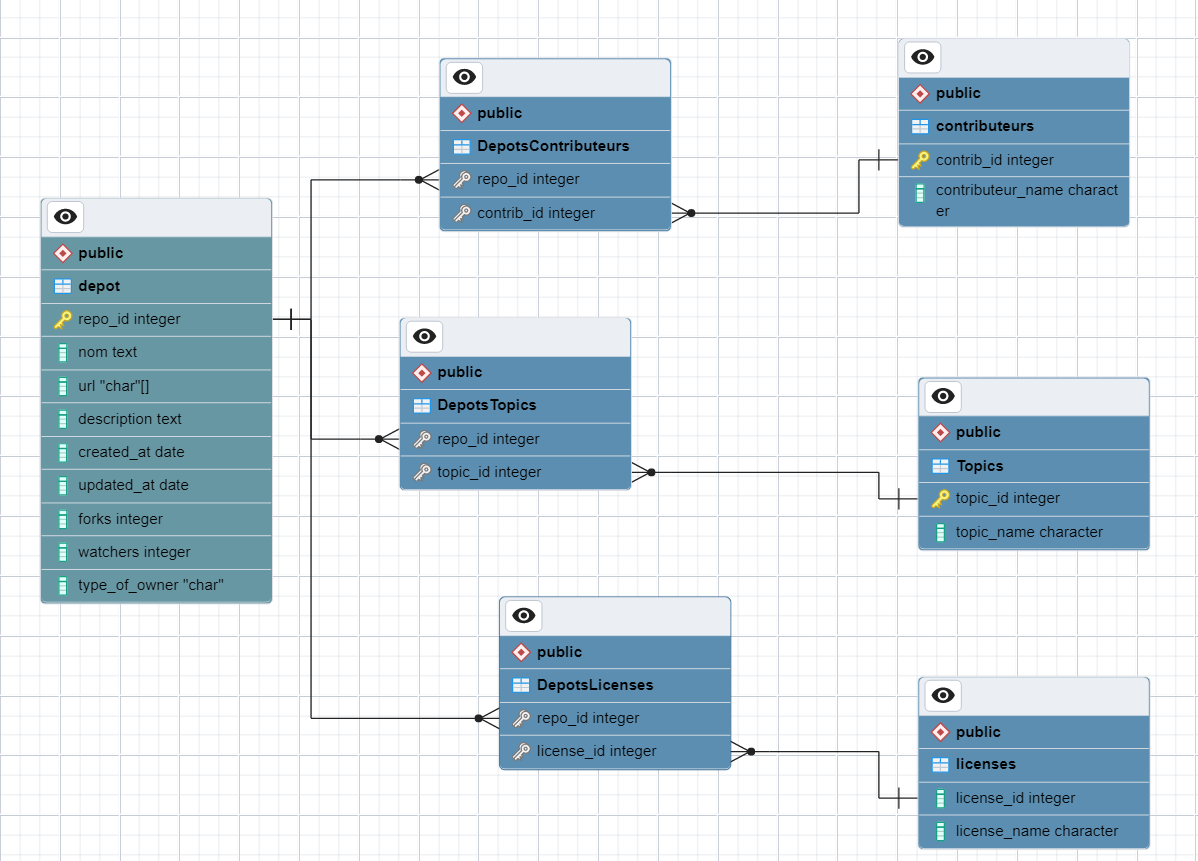

# Modèle Physique de Données (MPD)

Cette étape va consister à faire des scripts python pour gérer la base de données

In [3]:
import pyodbc
driver= '{ODBC Driver 17 for SQL Server}'

connexion = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='LAPTOP-L0N961TQ\SQLEXPRESS',
    Database='GitHub_Database'
)

In [2]:
cursor = connexion.cursor()
cursor.execute("CREATE DATABASE GitHub_Database;")

NameError: name 'connexion' is not defined